# Explore here

In [18]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import pickle


train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,3.0,111.0,30.1,30.0,0
1,2.0,98.0,34.7,22.0,0
2,4.0,131.0,33.1,28.0,0
3,8.0,120.0,25.0,64.0,0
4,10.0,108.0,32.4,42.0,1


In [19]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [20]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [22]:
accuracy_score(y_test, y_pred)

0.7702702702702703

In [23]:
pickle.dump(model, open("../models/model_orig.sav", "wb"))

# Optimizacion

In [30]:
# Importar libreria
from sklearn.model_selection import GridSearchCV

xg_grid = {"n_estimators": [150,250,350],
          "max_depth": [7,10,12],
          "learning_rate": [0.01,0.05, 0.1],
          "gamma": [0, 0.1,0.2],
          "alpha": [0.01,0.1,0.2]}

# Búsqueda por validación cruzada para XGBclassifier

xg_model_grid = GridSearchCV(XGBClassifier(),
                              param_grid=xg_grid,
                              scoring    = 'accuracy',
                              cv=5,
                              n_jobs = -1,
                              verbose=True)

xg_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.2], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [7, 10, 12],
                         'n_estimators': [150, 250, 350]},
             scoring='accuracy', verbose=True)

In [31]:
xg_model_grid.best_params_

{'alpha': 0.2,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 250}

In [32]:
xgb_ideal_model = XGBClassifier(n_estimators = 250,
                  max_depth = 7,
                  learning_rate = 0.01,
                  gamma = 0.1,
                  alpha = 0.2)
xgb_ideal_model.fit(X_train, y_train)

XGBClassifier(alpha=0.2, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
y_pred_gd = xgb_ideal_model.predict(X_test)
y_pred_gd

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [35]:

accuracy_score(y_test, y_pred_gd)

0.7702702702702703

No hay optimizacion con respecto al modelo original

In [36]:
pickle.dump(model, open("../models/model_optimizado.sav", "wb"))

In [38]:
df = (pd.DataFrame({"Caracteristicas": X_train.columns,
                        "valores": xgb_ideal_model.feature_importances_})
          .sort_values("valores", ascending=False))

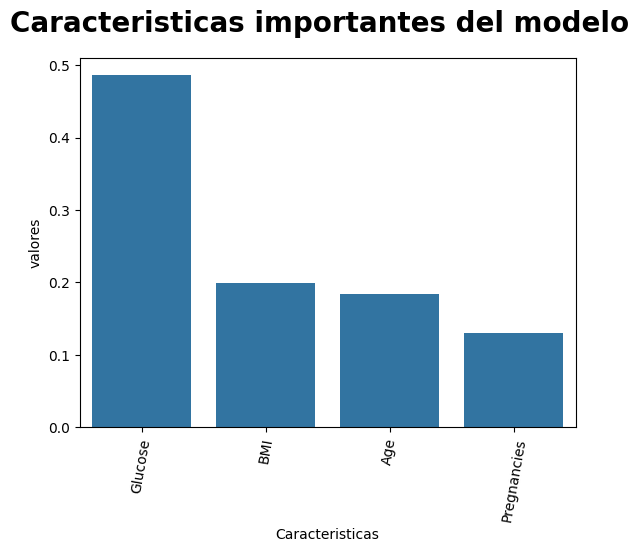

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Caracteristicas',y = 'valores',data = df, legend=False)
plt.suptitle('Caracteristicas importantes del modelo' , fontweight = 'black', fontsize=20)
plt.xticks(rotation=80);